## Bike Sharing Casestudy

__Problem Statement__ - A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. The bike rental data has bike sharing data on which company wants to build a mindful business plan to be able to accelerate its revenue .

The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Reading the day.csv bike sharing data file
raw_data = pd.read_csv('day.csv')

# Checking the data dimension
print(raw_data.shape)

# Let's have a view of the data
raw_data.head()


(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### For now it appears from the above pairplot that the probable influencing features/independent numerical variables could be 
1. temp/atemp(one of them could get eliminated as there is correlation among them)
2. casual and registered

### Data Preparation

In [3]:
# Checking for the NA values and datatype
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# To get a glimpse of the data properties of each column
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Removing instant which is just a serial number and dteday which doesn't contribute much information as we have month and year in different columns
varlist2remove = ['instant', 'dteday']

# Dropping the list of columns mentioned in the varlist2remove
raw_data.drop(raw_data[varlist2remove], axis = 'columns', inplace = True)
raw_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# From the dictionary it can be seen that season and weathersit are nominal variables. Converting the season and weathersit to string variable for inclusion in the model by converting it into dummy variables

raw_data.season = raw_data.season.apply(lambda x: 'spring' if (x == 1) else('summer' if (x == 2) else ( 'fall' if (x == 3 ) else 'winter')))

#raw_data.weathersit = raw_data.weathersit.apply(lambda x: 'WS_1' if (x == 1) else('WS_2' if (x == 2) else ( 'WS_3' if (x == 3 ) else 'WS_4')))

raw_data.weathersit = raw_data.weathersit.apply(lambda x: str(x))

raw_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Visualising the data

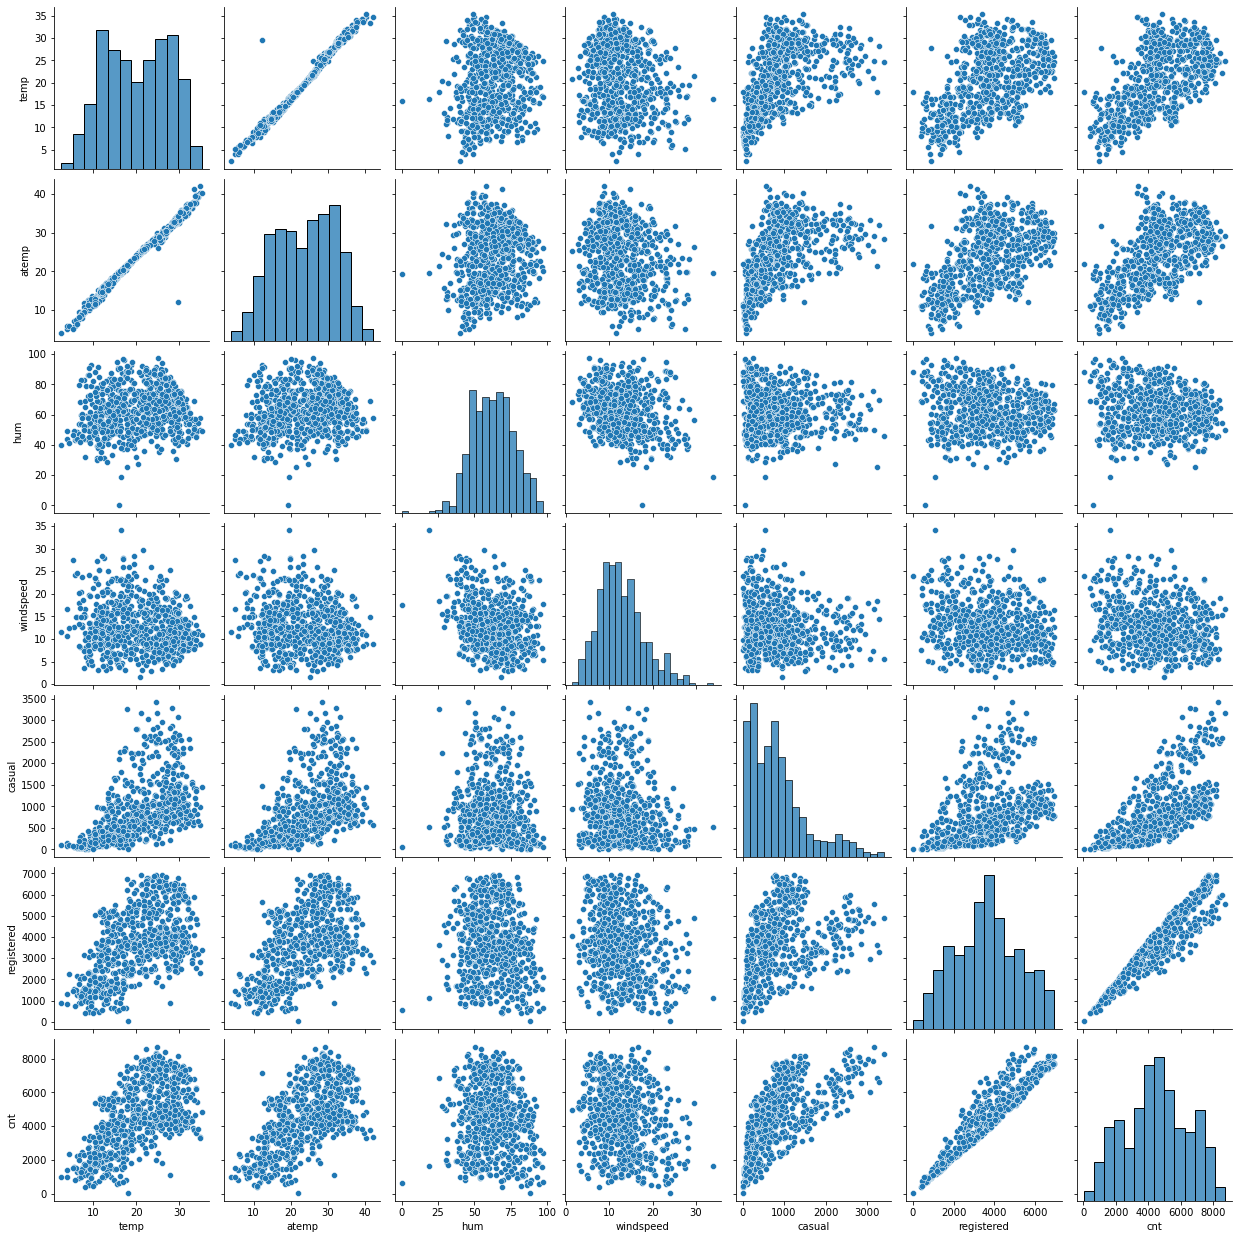

In [7]:
# To get a rough view of the probable influencing independent numerical variables on the target variable(cnt)
sns.pairplot(raw_data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

### Below are the inferences from the above pairplot

1. There is linear relationship between cnt which is the target variable and the temp and atemp
2. casual and registered variables are also having linear relationship with the target variable


## A linear relationship could be established from the above inferences between some independent and the dependent variable.

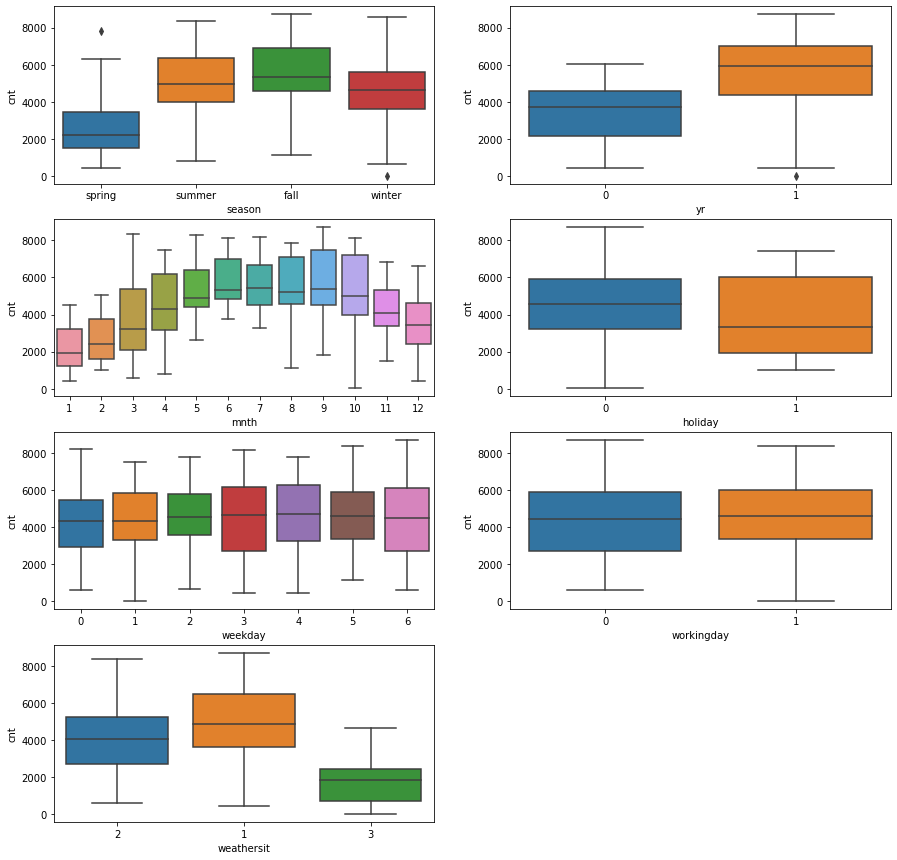

In [8]:
# Visualising the categorical variables season, yr, mnth, holiday, weekday, workingday, weathersit against the target
plt.figure(figsize = (15,15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = raw_data)

plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = raw_data)

plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = raw_data)

plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = raw_data)

plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = raw_data)

plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = raw_data)

plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = raw_data)

plt.show()


### Inferences
1. Fall is the season with highest average usage of bikes followed by summer, winter and spring
2. There is an increase in the bike usage from 2018 to 2019.
3. Average usage of the bikes across the months from May to october remains more or less the same with different IQR.
4. Average usage of bikes is less on holidays 
5. Average usgae of bikes remains the same across the week days with varying IQR.
6. More average usage of bikes with less IQR during working days.
7. There is more usage of bikes during Clear, Few clouds, Partly cloudy, Partly cloudy(Weather Situation 1).




### Creating dummy variables out of categorical variables

In [9]:
# Converting mnth and weekday to string and then to convert it into dummy variables as it is categorical
raw_data.mnth = raw_data.mnth.apply(lambda x: str(x))
raw_data.weekday = raw_data.weekday.apply(lambda x: str(x))

In [10]:
# Creating the dummy variables for the below listed categorical variables into a separate dataframe
status = pd.get_dummies(raw_data[['season', 'weathersit', 'mnth', 'weekday']], drop_first = True)
status.head()

,season_spring,season_summer,season_winter,weathersit_2,weathersit_3,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# Concatenating the raw_data and the status dataframes
raw_data = pd.concat([raw_data, status], axis = 1)
raw_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# Dropping the redundant variables from where the dummy variables are created
raw_data = raw_data.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1)

### Splitting the data into train and test data

In [13]:
# Splitting the data such that we have 70% of the data for the training set and remaining for testing
df_train, df_test = train_test_split(raw_data, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [14]:
# Rescaling the variables using normalisation so that the coefficients of various variables(categorical, continuous) are comparable and for ease of computation
scaler = MinMaxScaler()

In [15]:
# Selecting the variables which has values other than 0/1 for rescaling
rscale_varlist = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [16]:
# Checking once the datatype of all variables to ensure dummy variable creation and the deletion of the parent variables of dummies and that of the remaining ones
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   atemp          510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   casual         510 non-null    int64  
 8   registered     510 non-null    int64  
 9   cnt            510 non-null    int64  
 10  season_spring  510 non-null    uint8  
 11  season_summer  510 non-null    uint8  
 12  season_winter  510 non-null    uint8  
 13  weathersit_2   510 non-null    uint8  
 14  weathersit_3   510 non-null    uint8  
 15  mnth_10        510 non-null    uint8  
 16  mnth_11        510 non-null    uint8  
 17  mnth_12        510 non-null    uint8  
 18  mnth_2  

In [17]:
# Rescaling the variables in the rscale_varlist

df_train[rscale_varlist] = scaler.fit_transform(df_train[rscale_varlist])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,1,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,...,0,0,0,0,0,0,0,0,1,0


### 3. Training the model

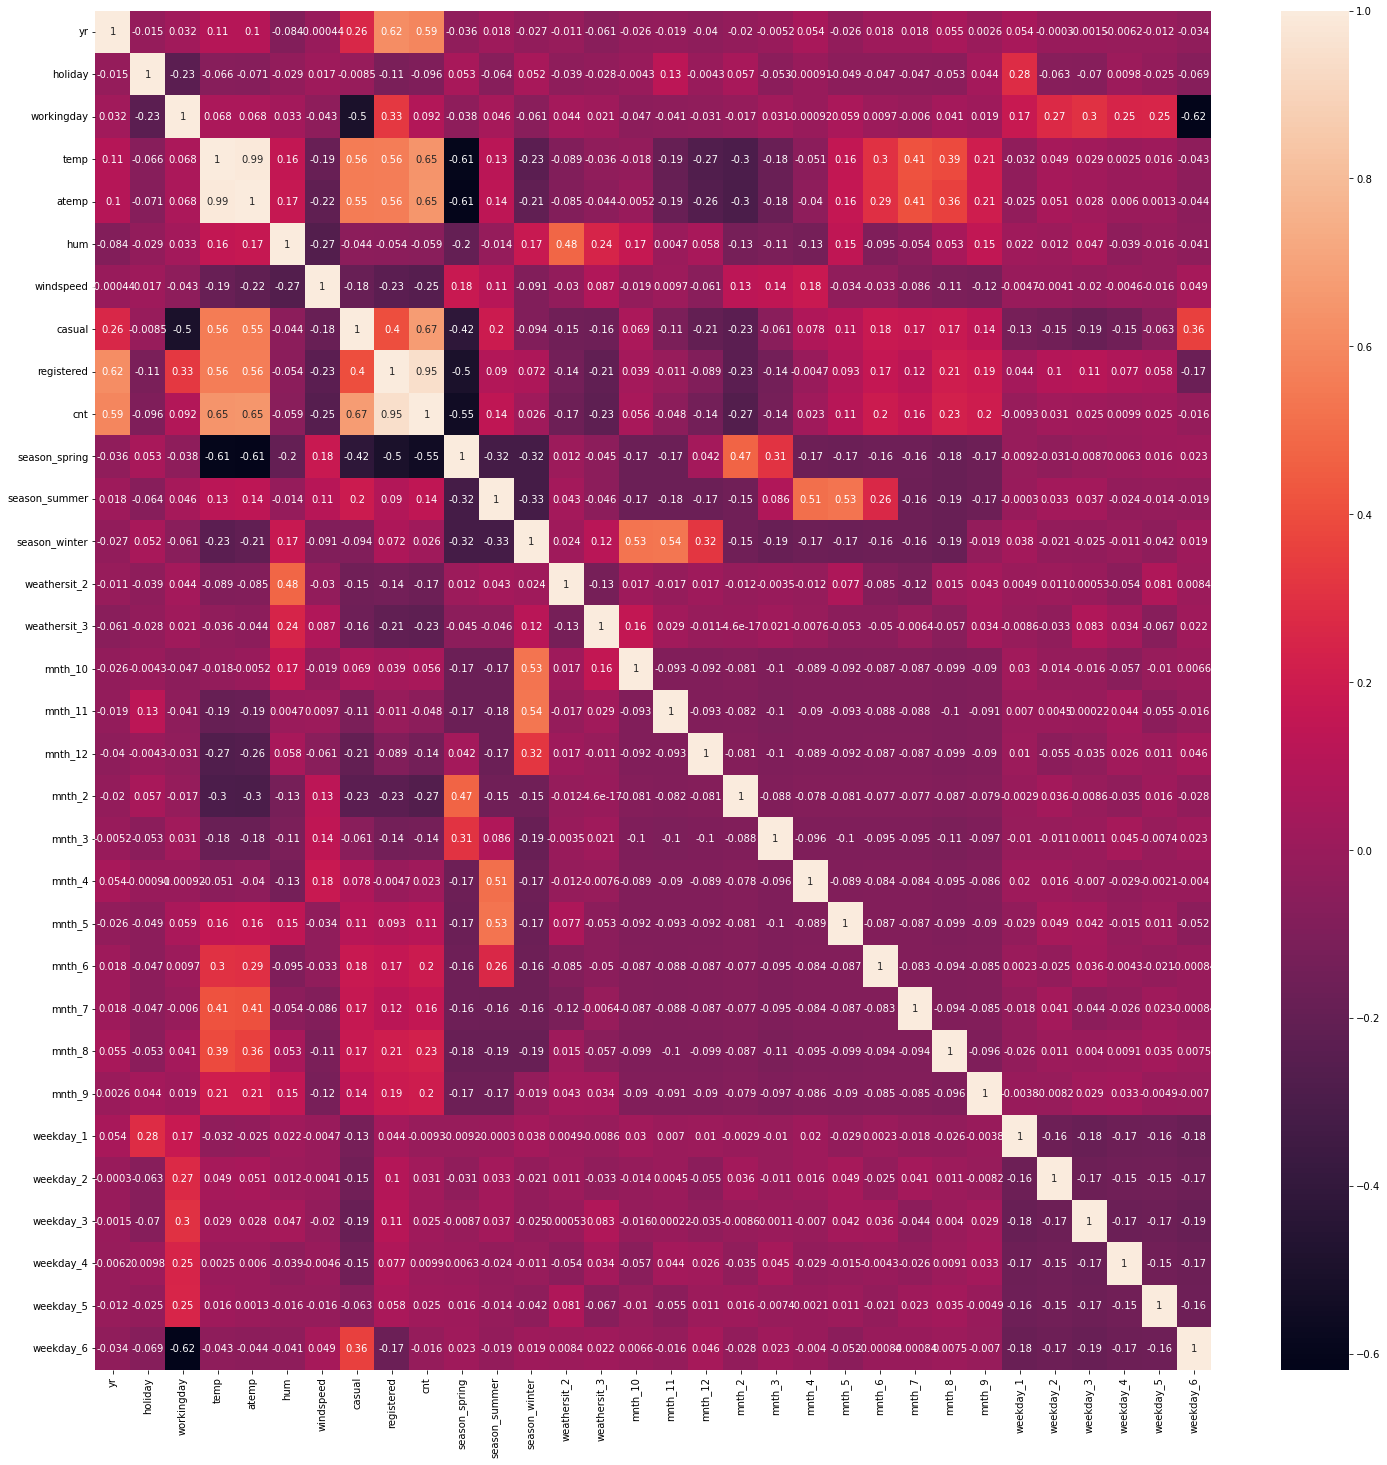

In [18]:
# Plotting the heatmap to see correlations between varaibles

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Correlation of cnt with other variables can be seen.

1. Appears positively moderately to highly correlated with yr, temp, atemp, casual,registered and others
2. Negatively correlated with Windspeed, spring season, febrauary month and others

### Since there are 31 independent variables using bottom up approach is not feasible. Lets build the model by using all the variables and then remove based on its contribution.

In [19]:
# Separating the independent variables from the dependent. 
# Dropping the casual and registered as they add up to give the cnt. Also dropping the atemp as it highly correlates with the temp
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered", 'atemp'], axis=1) 

print(X_train)
print(y_train.shape)


     yr  holiday  workingday      temp       hum  windspeed  season_spring  \
576   1        0           1  0.815169  0.725633   0.264686              0   
426   1        0           0  0.442393  0.640189   0.255342              1   
728   1        0           0  0.245101  0.498067   0.663106              1   
482   1        0           0  0.395666  0.504508   0.188475              0   
111   0        0           1  0.345824  0.751824   0.380981              0   
..   ..      ...         ...       ...       ...        ...            ...   
578   1        0           1  0.863973  0.679690   0.187140              0   
53    0        0           1  0.202618  0.435939   0.111379              1   
350   0        0           0  0.248216  0.577930   0.431816              0   
79    0        0           1  0.462664  0.759870   0.529881              0   
520   1        0           1  0.600225  0.632030   0.359599              0   

     season_summer  season_winter  weathersit_2  ...  mnth_6  m

__Building a model with all variables__

In [20]:
# Adding the constant
X_train_sm = sm.add_constant(X_train)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.00e-181
Time:                        07:15:13   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2211      0.043      5.189      0.000       0.137       0.305
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday          -0.0423      0.024     -1.792      0.074      -0.089       0.004
workingday        0.0438      0.009      4.680      0.000       0.025       0.062
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring    -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer     0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter     0.1076      0.028      3.853      0.000       0.053       0.163
weathersit_2     -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_3     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mnth_10           0.0709      0.034      2.055      0.040       0.003       0.139
mnth_11           0.0234      0.033      0.714      0.476      -0.041       0.088
mnth_12           0.0190      0.026      0.718      0.473      -0.033       0.071
mnth_2            0.0309      0.021      1.497      0.135      -0.010       0.071
mnth_3            0.0646      0.022      2.888      0.004       0.021       0.109
mnth_4            0.0633      0.034      1.885      0.060      -0.003       0.129
mnth_5            0.0880      0.036      2.433      0.015       0.017       0.159
mnth_6            0.0679      0.039      1.752      0.080      -0.008       0.144
mnth_7            0.0295      0.044      0.672      0.502      -0.057       0.116
mnth_8            0.0837      0.042      2.009      0.045       0.002       0.166
mnth_9            0.1493      0.037      3.997      0.000       0.076       0.223
weekday_1        -0.0099      0.010     -1.021      0.308      -0.029       0.009
weekday_2        -0.0069      0.011     -0.621      0.535      -0.029       0.015
weekday_3         0.0055      0.011      0.524      0.600      -0.015       0.026
weekday_4         0.0019      0.011      0.172      0.864      -0.020       0.023
weekday_5         0.0110      0.011      0.987      0.324      -0.011       0.033
weekday_6         0.0542      0.015      3.732      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.68e+15
================================================================

### VIF Calculation

In [21]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\raora\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,weekday_3,inf
23,weekday_2,inf
1,holiday,inf
25,weekday_4,inf
26,weekday_5,inf
22,weekday_1,inf
2,workingday,inf
3,temp,46.11
4,hum,32.73
8,season_winter,10.25


#### Iteration 1 - Lets remove weekday_4  which has high p_value and high VIF value. 

In [22]:
X = X_train.drop('weekday_4', axis = 1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.00e-181
Time:                        07:15:13   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2211      0.043      5.189      0.000       0.137       0.305
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday          -0.0404      0.030     -1.346      0.179      -0.099       0.019
workingday        0.0457      0.015      3.016      0.003       0.016       0.075
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring    -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer     0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter     0.1076      0.028      3.853      0.000       0.053       0.163
weathersit_2     -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_3     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mnth_10           0.0709      0.034      2.055      0.040       0.003       0.139
mnth_11           0.0234      0.033      0.714      0.476      -0.041       0.088
mnth_12           0.0190      0.026      0.718      0.473      -0.033       0.071
mnth_2            0.0309      0.021      1.497      0.135      -0.010       0.071
mnth_3            0.0646      0.022      2.888      0.004       0.021       0.109
mnth_4            0.0633      0.034      1.885      0.060      -0.003       0.129
mnth_5            0.0880      0.036      2.433      0.015       0.017       0.159
mnth_6            0.0679      0.039      1.752      0.080      -0.008       0.144
mnth_7            0.0295      0.044      0.672      0.502      -0.057       0.116
mnth_8            0.0837      0.042      2.009      0.045       0.002       0.166
mnth_9            0.1493      0.037      3.997      0.000       0.076       0.223
weekday_1        -0.0118      0.015     -0.780      0.436      -0.042       0.018
weekday_2        -0.0088      0.015     -0.571      0.568      -0.039       0.022
weekday_3         0.0036      0.015      0.248      0.804      -0.025       0.032
weekday_5         0.0091      0.016      0.588      0.557      -0.021       0.040
weekday_6         0.0542      0.015      3.732      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [23]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.11
4,hum,32.73
8,season_winter,10.25
2,workingday,9.59
7,season_summer,8.91
20,mnth_8,8.39
19,mnth_7,7.51
6,season_spring,7.23
17,mnth_5,6.74
18,mnth_6,6.53


#### Iteration 2 - Dropping mnth_7 variable which has both high p_value and high VIF

In [24]:
X = X.drop('mnth_7', axis = 1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.58e-182
Time:                        07:15:13   Log-Likelihood:                 526.79
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     483   BIC:                            -885.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2344      0.038      6.206      0.000       0.160       0.309
yr                0.2320      0.008     28.884      0.000       0.216       0.248
holiday          -0.0421      0.030     -1.409      0.160      -0.101       0.017
workingday        0.0450      0.015      2.977      0.003       0.015       0.075
temp              0.4635      0.038     12.360      0.000       0.390       0.537
hum              -0.1549      0.038     -4.055      0.000      -0.230      -0.080
windspeed        -0.1858      0.026     -7.224      0.000      -0.236      -0.135
season_spring    -0.0568      0.024     -2.359      0.019      -0.104      -0.009
season_summer     0.0371      0.025      1.508      0.132      -0.011       0.085
season_winter     0.1010      0.026      3.865      0.000       0.050       0.152
weathersit_2     -0.0592      0.010     -5.686      0.000      -0.080      -0.039
weathersit_3     -0.2550      0.026     -9.684      0.000      -0.307      -0.203
mnth_10           0.0574      0.028      2.045      0.041       0.002       0.113
mnth_11           0.0123      0.028      0.434      0.665      -0.043       0.068
mnth_12           0.0106      0.023      0.454      0.650      -0.035       0.056
mnth_2            0.0267      0.020      1.358      0.175      -0.012       0.065
mnth_3            0.0560      0.018      3.052      0.002       0.020       0.092
mnth_4            0.0493      0.026      1.874      0.062      -0.002       0.101
mnth_5            0.0715      0.027      2.687      0.007       0.019       0.124
mnth_6            0.0469      0.023      2.052      0.041       0.002       0.092
mnth_8            0.0585      0.018      3.201      0.001       0.023       0.094
mnth_9            0.1277      0.019      6.679      0.000       0.090       0.165
weekday_1        -0.0114      0.015     -0.756      0.450      -0.041       0.018
weekday_2        -0.0084      0.015     -0.542      0.588      -0.039       0.022
weekday_3         0.0039      0.015      0.267      0.790      -0.025       0.033
weekday_5         0.0095      0.016      0.614      0.539      -0.021       0.040
weekday_6         0.0542      0.015      3.731      0.000       0.026       0.083
==============================================================================
Omnibus:                       81.508   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.952
Skew:                          -0.785   Prob(JB):                     1.05e-48
Kurtosis:                       5.816   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.25
3,temp,20.15
8,season_winter,9.87
2,workingday,9.58
7,season_summer,8.66
6,season_spring,5.91
5,windspeed,5.12
12,mnth_11,4.42
11,mnth_10,4.33
17,mnth_5,3.85


#### Iteration 3 - season_summer has both high p_value and high VIF, Lets remove windspeed and rebuild the model

In [26]:
X = X.drop('season_summer', axis = 1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.04e-182
Time:                        07:15:14   Log-Likelihood:                 525.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     484   BIC:                            -889.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2534      0.036      7.108      0.000       0.183       0.323
yr                0.2327      0.008     28.994      0.000       0.217       0.248
holiday          -0.0401      0.030     -1.342      0.180      -0.099       0.019
workingday        0.0453      0.015      2.992      0.003       0.016       0.075
temp              0.4372      0.033     13.161      0.000       0.372       0.502
hum              -0.1468      0.038     -3.878      0.000      -0.221      -0.072
windspeed        -0.1836      0.026     -7.139      0.000      -0.234      -0.133
season_spring    -0.0786      0.019     -4.073      0.000      -0.117      -0.041
season_winter     0.0886      0.025      3.568      0.000       0.040       0.137
weathersit_2     -0.0596      0.010     -5.719      0.000      -0.080      -0.039
weathersit_3     -0.2578      0.026     -9.803      0.000      -0.309      -0.206
mnth_10           0.0579      0.028      2.058      0.040       0.003       0.113
mnth_11           0.0095      0.028      0.337      0.736      -0.046       0.065
mnth_12           0.0091      0.023      0.389      0.697      -0.037       0.055
mnth_2            0.0310      0.019      1.589      0.113      -0.007       0.069
mnth_3            0.0690      0.016      4.259      0.000       0.037       0.101
mnth_4            0.0743      0.020      3.633      0.000       0.034       0.114
mnth_5            0.0999      0.019      5.298      0.000       0.063       0.137
mnth_6            0.0659      0.019      3.453      0.001       0.028       0.103
mnth_8            0.0541      0.018      2.994      0.003       0.019       0.090
mnth_9            0.1229      0.019      6.510      0.000       0.086       0.160
weekday_1        -0.0116      0.015     -0.769      0.442      -0.041       0.018
weekday_2        -0.0083      0.015     -0.535      0.593      -0.039       0.022
weekday_3         0.0043      0.015      0.290      0.772      -0.025       0.033
weekday_5         0.0092      0.016      0.593      0.554      -0.021       0.040
weekday_6         0.0550      0.015      3.785      0.000       0.026       0.084
==============================================================================
Omnibus:                       83.142   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.320
Skew:                          -0.789   Prob(JB):                     2.16e-51
Kurtosis:                       5.914   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.92
3,temp,17.63
2,workingday,9.50
7,season_winter,9.33
5,windspeed,4.95
11,mnth_11,4.42
10,mnth_10,4.33
6,season_spring,4.25
12,mnth_12,2.93
8,weathersit_2,2.32


#### Iteration 4 - Dropping weekday_3 as it has high p_value and low VIF.

In [28]:
X = X.drop('weekday_3', axis = 1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.90e-184
Time:                        07:15:14   Log-Likelihood:                 525.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2531      0.036      7.109      0.000       0.183       0.323
yr                0.2327      0.008     29.023      0.000       0.217       0.248
holiday          -0.0382      0.029     -1.312      0.190      -0.095       0.019
workingday        0.0476      0.013      3.714      0.000       0.022       0.073
temp              0.4372      0.033     13.173      0.000       0.372       0.502
hum              -0.1465      0.038     -3.874      0.000      -0.221      -0.072
windspeed        -0.1836      0.026     -7.147      0.000      -0.234      -0.133
season_spring    -0.0785      0.019     -4.073      0.000      -0.116      -0.041
season_winter     0.0888      0.025      3.580      0.000       0.040       0.138
weathersit_2     -0.0596      0.010     -5.722      0.000      -0.080      -0.039
weathersit_3     -0.2577      0.026     -9.809      0.000      -0.309      -0.206
mnth_10           0.0578      0.028      2.058      0.040       0.003       0.113
mnth_11           0.0093      0.028      0.330      0.742      -0.046       0.065
mnth_12           0.0088      0.023      0.379      0.705      -0.037       0.055
mnth_2            0.0311      0.019      1.595      0.111      -0.007       0.069
mnth_3            0.0689      0.016      4.258      0.000       0.037       0.101
mnth_4            0.0744      0.020      3.645      0.000       0.034       0.115
mnth_5            0.1001      0.019      5.314      0.000       0.063       0.137
mnth_6            0.0661      0.019      3.468      0.001       0.029       0.103
mnth_8            0.0542      0.018      2.999      0.003       0.019       0.090
mnth_9            0.1228      0.019      6.515      0.000       0.086       0.160
weekday_1        -0.0139      0.013     -1.077      0.282      -0.039       0.011
weekday_2        -0.0106      0.013     -0.805      0.421      -0.036       0.015
weekday_5         0.0069      0.013      0.518      0.605      -0.019       0.033
weekday_6         0.0550      0.015      3.790      0.000       0.026       0.084
==============================================================================
Omnibus:                       83.623   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.253
Skew:                          -0.793   Prob(JB):                     8.23e-52
Kurtosis:                       5.925   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.92
3,temp,17.62
7,season_winter,9.33
2,workingday,6.74
5,windspeed,4.95
11,mnth_11,4.42
10,mnth_10,4.33
6,season_spring,4.25
12,mnth_12,2.92
8,weathersit_2,2.32


#### Iteration 5 - mnth_11 	has high p_value and low VIF, lets remove that.

In [30]:
X = X.drop('mnth_11', axis = 1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.38e-185
Time:                        07:15:14   Log-Likelihood:                 525.49
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2546      0.035      7.217      0.000       0.185       0.324
yr                0.2327      0.008     29.050      0.000       0.217       0.248
holiday          -0.0369      0.029     -1.280      0.201      -0.093       0.020
workingday        0.0477      0.013      3.727      0.000       0.023       0.073
temp              0.4358      0.033     13.247      0.000       0.371       0.500
hum              -0.1459      0.038     -3.866      0.000      -0.220      -0.072
windspeed        -0.1827      0.026     -7.160      0.000      -0.233      -0.133
season_spring    -0.0790      0.019     -4.116      0.000      -0.117      -0.041
season_winter     0.0944      0.018      5.212      0.000       0.059       0.130
weathersit_2     -0.0597      0.010     -5.747      0.000      -0.080      -0.039
weathersit_3     -0.2577      0.026     -9.819      0.000      -0.309      -0.206
mnth_10           0.0508      0.018      2.761      0.006       0.015       0.087
mnth_12           0.0035      0.017      0.207      0.836      -0.029       0.036
mnth_2            0.0298      0.019      1.562      0.119      -0.008       0.067
mnth_3            0.0677      0.016      4.301      0.000       0.037       0.099
mnth_4            0.0729      0.020      3.664      0.000       0.034       0.112
mnth_5            0.0989      0.018      5.357      0.000       0.063       0.135
mnth_6            0.0651      0.019      3.462      0.001       0.028       0.102
mnth_8            0.0532      0.018      2.987      0.003       0.018       0.088
mnth_9            0.1204      0.017      6.925      0.000       0.086       0.155
weekday_1        -0.0142      0.013     -1.107      0.269      -0.040       0.011
weekday_2        -0.0107      0.013     -0.818      0.414      -0.037       0.015
weekday_5         0.0067      0.013      0.505      0.614      -0.019       0.033
weekday_6         0.0549      0.014      3.787      0.000       0.026       0.083
==============================================================================
Omnibus:                       83.280   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.364
Skew:                          -0.789   Prob(JB):                     1.28e-51
Kurtosis:                       5.922   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.29
3,temp,17.54
2,workingday,6.72
5,windspeed,4.82
6,season_spring,4.25
7,season_winter,4.22
8,weathersit_2,2.31
0,yr,2.11
22,weekday_6,1.99
17,mnth_8,1.97


### Even after 5 iterations there are still multiple variables which are still having higher p-value. So manual method of dropping one at a time is also infeasible. Considering RFE.

## Using RFE to get the important independent variables

### Using the training data which was used for the manual method before removing any of the variables

In [32]:
# Checking the data once before using in RFE
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_spring,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.243137,...,0.076471,0.076471,0.096078,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.429398,...,0.266010,0.266010,0.294988,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Using the already separated dependent(y_train which contains cnt) and independent variables

X_train = df_train.drop(["casual","registered", 'atemp'], axis=1) 

# Confirming the dataframe shape with that from same used in the beginning of the manual method
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


### 510 records and 28 columns is the same with which we started the manual method and we are good to go with RFE.

### Step 1. Model Building with RFE for 15 variables

In [34]:
lm = LinearRegression()
#lm.fit(X_train, y_train)

In [35]:
#Selecting the first 15 variables
rfe = RFE(estimator = lm, n_features_to_select = 15, step = 1 )
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', False, 5),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('mnth_2', False, 11),
 ('mnth_3', False, 6),
 ('mnth_4', False, 7),
 ('mnth_5', False, 4),
 ('mnth_6', False, 8),
 ('mnth_7', False, 14),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3)]

In [37]:
# Selecting the columns which are shortlisted by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'weathersit_3', 'mnth_10', 'mnth_9', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

#####    1a. Getting the model statistics with statsmodel with these selected 15 variables

In [38]:
# Selecting the data for the shortlisted columns
X_train_rfe = X_train[col]

# Adding a constant required for the statsmodel
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.39e-175
Time:                        07:15:15   Log-Likelihood:                 479.90
No. Observations:                 510   AIC:                            -929.8
Df Residuals:                     495   BIC:                            -866.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4283      0.030     14.291

####      1b. VIF calculation for 15 variables

In [39]:
X = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\raora\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_1,inf
11,weekday_2,inf
12,weekday_3,inf
13,weekday_4,inf
14,weekday_5,inf
4,hum,11.19
3,temp,8.89
5,windspeed,3.94


### Step 2 -  Since there are VIFs which are inf, lets manually remove the variable with high p_value and high VIF. From that rule weekday_3 has highest p_value and VIF as infinity. Lets remove weekday_3 and build model using statsmodel.

#### 2a - Manual removal of weekday_3 and build the model

In [40]:
X = X.drop('weekday_3', axis = 1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.39e-175
Time:                        07:15:15   Log-Likelihood:                 479.90
No. Observations:                 510   AIC:                            -929.8
Df Residuals:                     495   BIC:                            -866.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4283      0.030     14.291      0.000       0.369       0.487
yr                0.2319      0.009     26.926      0.000       0.215       0.249
holiday          -0.0562      0.031     -1.805      0.072      -0.117       0.005
workingday        0.0234      0.013      1.768      0.078      -0.003       0.049
temp              0.3909      0.024     15.954      0.000       0.343       0.439
hum              -0.2484      0.032     -7.655      0.000      -0.312      -0.185
windspeed        -0.1900      0.027     -7.115      0.000      -0.242      -0.138
season_spring    -0.1416      0.013    -10.958      0.000      -0.167      -0.116
weathersit_3     -0.2146      0.027     -8.037      0.000      -0.267      -0.162
mnth_10           0.0725      0.016      4.495      0.000       0.041       0.104
mnth_9            0.0781      0.016      4.792      0.000       0.046       0.110
weekday_1        -0.0194      0.016     -1.232      0.219      -0.050       0.012
weekday_2        -0.0145      0.016     -0.910      0.363      -0.046       0.017
weekday_4        -0.0045      0.016     -0.283      0.777      -0.036       0.027
weekday_5        -0.0051      0.016     -0.320      0.749      -0.037       0.026
==============================================================================
Omnibus:                       64.601   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.756
Skew:                          -0.687   Prob(JB):                     3.69e-32
Kurtosis:                       5.220   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2b. Calculating VIF

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,11.19
3,temp,8.89
2,workingday,6.50
5,windspeed,3.94
10,weekday_1,2.08
0,yr,2.04
6,season_spring,1.90
12,weekday_4,1.85
11,weekday_2,1.84
13,weekday_5,1.82


### From the above statistics we can see that R-squared has not decreased and there is no loss of information and also we can see that none of the variable VIFs are infinite. Lets continue with RFE with the above data as base.

`Lets confirm the shape of X`

In [42]:
X.shape

(510, 14)

`We have 14 columns(15-1)  and will drop few variables from this using RFE`

### Step 3. RFE for 7 variables from the selected 15 variables in the above step

In [43]:
lm1 = LinearRegression()
lm1.fit(X, y_train)

#Selecting the first 10 variables
rfe1 = RFE(estimator = lm1, n_features_to_select = 7, step = 1)
rfe1 = rfe1.fit(X, y_train)

list(zip(X.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_10', False, 3),
 ('mnth_9', False, 2),
 ('weekday_1', False, 5),
 ('weekday_2', False, 6),
 ('weekday_4', False, 8),
 ('weekday_5', False, 7)]

In [44]:
# Selecting the columns which are shortlisted by RFE
col1 = X.columns[rfe1.support_]
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'weathersit_3'],
      dtype='object')

#####    3a. Getting the model statistics with statsmodel with these selected 7 variables


In [45]:
# Selecting the data for the shortlisted columns
X_train_rfe = X[col1]
X = X[col1]

# Adding a constant required for the statsmodel
X = sm.add_constant(X)
lm = sm.OLS(y_train,X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     300.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.54e-175
Time:                        07:15:16   Log-Likelihood:                 458.82
No. Observations:                 510   AIC:                            -901.6
Df Residuals:                     502   BIC:                            -867.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4356      0.030     14.381

####      3b. VIF calculation for 7 variables

In [46]:
X = X.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.75
2,temp,8.40
4,windspeed,3.86
0,yr,2.03
5,season_spring,1.78
6,weathersit_3,1.10
1,holiday,1.03


### Step 4 - Lets drop hum from the data and rebuild the model

#### 4a - Manual removal of hum and build the model

In [47]:
X = X.drop('hum', axis=1)

# Adding the constant
X_train_sm = sm.add_constant(X)

# Create the model
mlr = sm.OLS(y_train, X_train_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     316.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.00e-167
Time:                        07:15:16   Log-Likelihood:                 437.71
No. Observations:                 510   AIC:                            -861.4
Df Residuals:                     503   BIC:                            -831.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2794      0.020     14.253      0.000       0.241       0.318
yr                0.2365      0.009     25.641      0.000       0.218       0.255
holiday          -0.0720      0.029     -2.475      0.014      -0.129      -0.015
temp              0.3843      0.026     14.868      0.000       0.334       0.435
windspeed        -0.1492      0.028     -5.392      0.000      -0.204      -0.095
season_spring    -0.1466      0.014    -10.841      0.000      -0.173      -0.120
weathersit_3     -0.2451      0.027     -8.965      0.000      -0.299      -0.191
==============================================================================
Omnibus:                       51.347   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                          -0.626   Prob(JB):                     7.53e-21
Kurtosis:                       4.671   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Confirming the shape post removal
X.shape

(510, 6)

#### 4b. VIF calculation after dropping a variables

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.64
2,temp,3.37
0,yr,2.02
4,season_spring,1.50
5,weathersit_3,1.05
1,holiday,1.03


#### There is no significant reduction in R-Squared value(0.823) from when 15 variables were considered and that(0.791) after just retaining the top 6 variables. So there is no loss in information.
AIC and BIC with all parameters <br>
    AIC: 	-998.1
    BIC: 	-879.5
    
AIC and BIC in the final model with just 6 parameters<br>
    AIC: 	-861.4
    BIC: 	-831.8

Lesser the AIC and BIC values, better is the model. The AIC and BIC with reduced variables is performing well without losing more information which is observed in R-Squared values.


### Final Model - All the variables are significant and also the VIFs are within the range of 5(No multi collinearity)

In [50]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'weathersit_3'], dtype='object')

### 4. Residual Analysis

#### Note - mlr_model contains the model built. We need to perform residual analysis on this

In [51]:
y_train_pred = mlr_model.predict(X_train_sm)

C:\Users\raora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

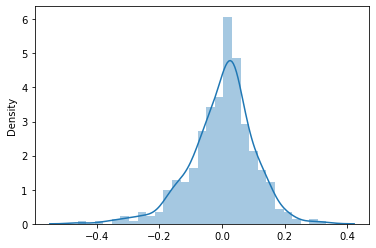

In [52]:
res = y_train - y_train_pred
sns.distplot(res)

### The above validates that the residuals are normally distributed and centered at 0. This is one of the assumptions in MLR

### 5. Prediction on the test test and model evaluation

In [53]:
# Selecting the variables which has values other than 0/1 for rescaling
rscale_varlist = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Rescaling the variables in the rscale_varlist

df_test[rscale_varlist] = scaler.transform(df_test[rscale_varlist])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,1,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,1,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,1,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,1,0,0,0,0,0,0,1,0,0


In [54]:
# To check the rescaled data on the test data once
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_6,mnth_7,mnth_8,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,...,0.095455,0.104545,0.059091,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,...,0.294512,0.306665,0.236333,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Separating the dependent and independent variables
y_test = df_test.pop('cnt')
X_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

In [56]:
# Adding a constant
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,weathersit_3
184,1.0,0,1,0.831783,0.084219,0,0
535,1.0,1,0,0.901354,0.153728,0,0
299,1.0,0,0,0.511964,0.334206,0,0
221,1.0,0,0,0.881625,0.339570,0,0
152,1.0,0,0,0.817246,0.537414,0,0


In [57]:
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,weathersit_3
184,1.0,0,1,0.831783,0.084219,0,0
535,1.0,1,0,0.901354,0.153728,0,0
299,1.0,0,0,0.511964,0.334206,0,0
221,1.0,0,0,0.881625,0.339570,0,0
152,1.0,0,0,0.817246,0.537414,0,0


In [58]:
# Predictions on the test set
y_test_pred = mlr_model.predict(X_test_sm)

In [59]:
# getting the R-Squared value for the predictions on the test set
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7782351794409559

### The train data R-Squared value 0.791 is comparable with the test data R-Squared obtained in the above step. The model fit is good and has generalised by performing more or less equally on train and test data.

C:\Users\raora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


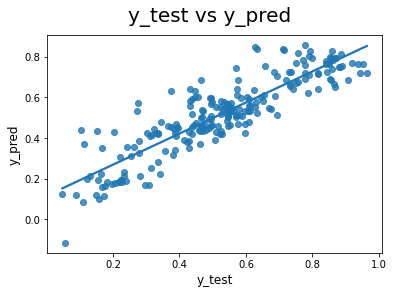

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_test_pred, ci=None)  
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=12)                          
plt.ylabel('y_pred', fontsize=12)
plt.show()

### Homoscedasticity check

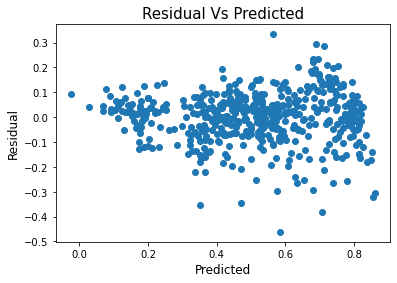

In [61]:
plt.scatter(y_train_pred, res)
plt.ylabel('Residual', fontsize=12)                          
plt.xlabel('Predicted', fontsize=12) 
plt.title("Residual Vs Predicted", fontsize = 15)
plt.show()

#### Except for some outliers, much of the data variance is between -0.2 to +0.2 with no pattern in data.

### Assumptions Validated
1. Residuals are normally distributed and centered at 0.
2. Constant variance as residuals are normally distributed and from the above plot.
3. No multicollinearity as seen from VIF of variables in the final model.
4. There is a linear relationship from the above plot.

### Learnings - Started with manual method by including all the variables and then dropping one at a time and even after 5 iterations there were many variables with significant p_values. This was done mainly to not loose out on any predictive power of any variables that is contributing. Then the strategy to build the model was changed to a mixture of RFE and manual. Started with 15 variables in RFE, but still the model was not refined and had multicollinearity issues with multiple variables having VIF as infinity. Manually dropped one of the variable and built the model. After this the VIFs of few variables were still high but not infinity. Kept the list of variables selected till here as reference and on that once again RFE was used to reduce to 7 variables. Manual method for variable removal was done after this to arrive at the final model.